In [ ]:
!pip install shap

Logistic Regression Model Performance:
Accuracy: 0.8833333333333333
Precision: 0.5
Recall: 0.02857142857142857
F1 Score: 0.05405405405405406

Confusion Matrix:
 [[264   1]
 [ 34   1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       265
           1       0.50      0.03      0.05        35

    accuracy                           0.88       300
   macro avg       0.69      0.51      0.50       300
weighted avg       0.84      0.88      0.83       300



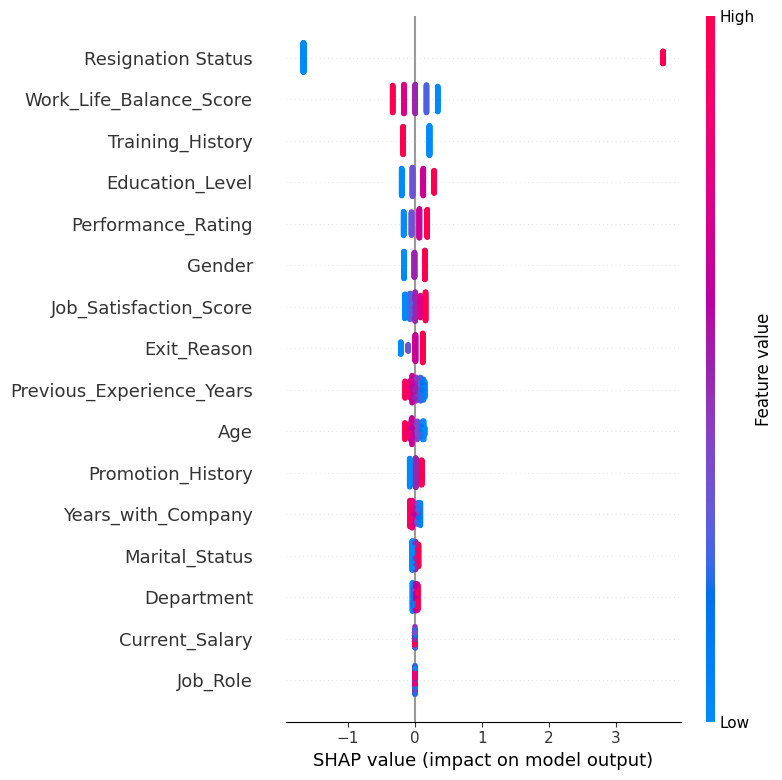

In [ ]:
# Step 1: Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
import shap

# Step 2: Load and Preprocess the Dataset
file_path = '/content/Avinash project 4 LEARNTUBE.csv'  # Update with the actual path
data = pd.read_csv(file_path)

# Encoding categorical variables
categorical_cols = ['Gender', 'Marital_Status', 'Education_Level', 'Job_Role', 'Department', 'Training_History', 'Exit_Reason', 'Resignation Status']
for col in categorical_cols:
    data[col] = LabelEncoder().fit_transform(data[col])

# Encode the target variable ('Status' as 1 for Terminated, 0 for Active)
data['Status'] = data['Status'].apply(lambda x: 1 if x == 'Terminated' else 0)

# Drop unnecessary columns
data.drop(columns=['Employee_ID', 'Date_of_Joining', 'Date_of_Leaving'], inplace=True)

# Split data into features (X) and target (y)
X = data.drop(columns=['Status'])
y = data['Status']

# Step 3: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Standardize the Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Build and Train the Logistic Regression Model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Step 6: Make Predictions and Evaluate the Model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display evaluation results
print("Logistic Regression Model Performance:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Set up SHAP for feature importance analysis
explainer = shap.LinearExplainer(model, X_train)
shap_values = explainer.shap_values(X_test)

# Plot overall feature importance
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# Step 8: Explain an Individual Prediction (optional)
# Visualize how each feature contributes to an example prediction
# This will help understand specific factors leading to termination
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test[0,:], feature_names=X.columns)


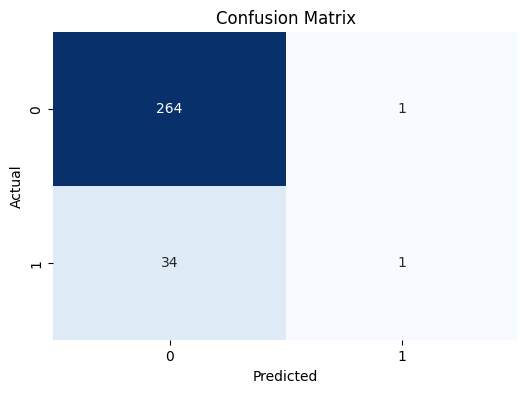

Additional Evaluation Metrics:
Accuracy: 88.33%
Precision: 50.00%
Recall: 2.86%
F1 Score: 5.41%


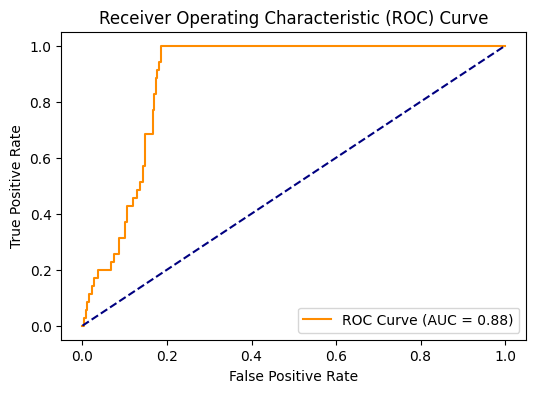


Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       265
           1       0.50      0.03      0.05        35

    accuracy                           0.88       300
   macro avg       0.69      0.51      0.50       300
weighted avg       0.84      0.88      0.83       300



In [ ]:
# Step 9: Additional Metrics and Accuracy Visualization

# Display the confusion matrix as a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Calculate additional evaluation metrics (Accuracy, Precision, Recall, F1 Score) for better insights
print("Additional Evaluation Metrics:")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")

# ROC Curve and AUC Score
from sklearn.metrics import roc_curve, auc

# Get the probability predictions for ROC calculation
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate false positive and true positive rates for ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Dashed line for random guessing
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

# Classification Report Summary
print("\nDetailed Classification Report:")
print(class_report)
